In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("D:\Work\Projects\Seoul Bike Prediction\Dataset\SeoulBikeData.csv",encoding = "ISO-8859-1")


<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\shiva\AppData\Local\Temp\ipykernel_10188\2476860093.py:1: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv("D:\Work\Projects\Seoul Bike Prediction\Dataset\SeoulBikeData.csv",encoding = "ISO-8859-1")


In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,30/11/2018,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
df.isnull().sum()

In [5]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

df['Week_Day'] = df['Date'].dt.day_name()
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop("Date",axis=1,inplace=True)

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Week_Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


In [34]:
#sns.pairplot(df)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

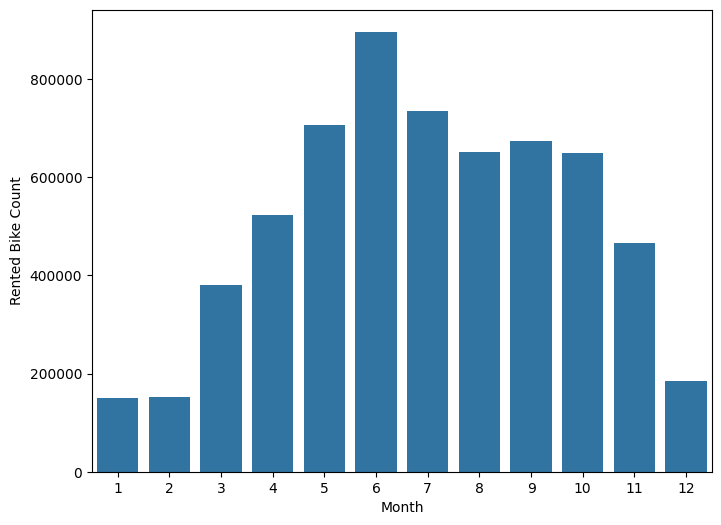

In [8]:
plt.figure(figsize=(8,6))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month",y="Rented Bike Count",data=Month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

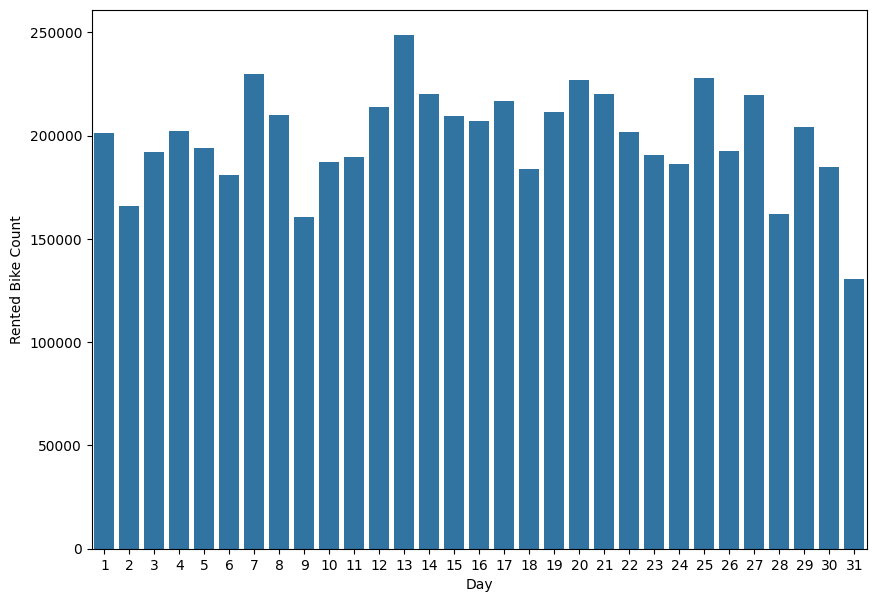

In [9]:
plt.figure(figsize=(10,7))
Month = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day",y="Rented Bike Count",data=Month)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

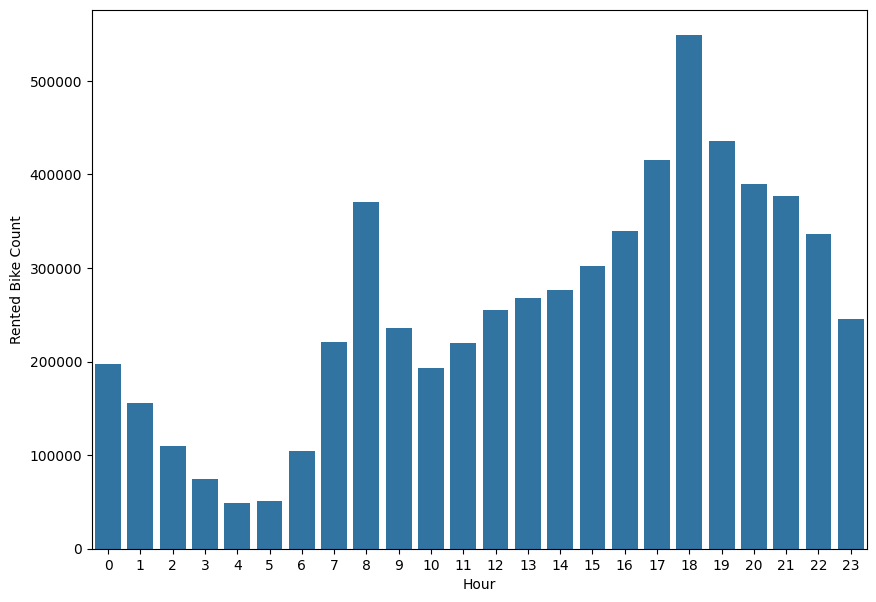

In [10]:
plt.figure(figsize=(10,7))
Month = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour",y="Rented Bike Count",data=Month)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

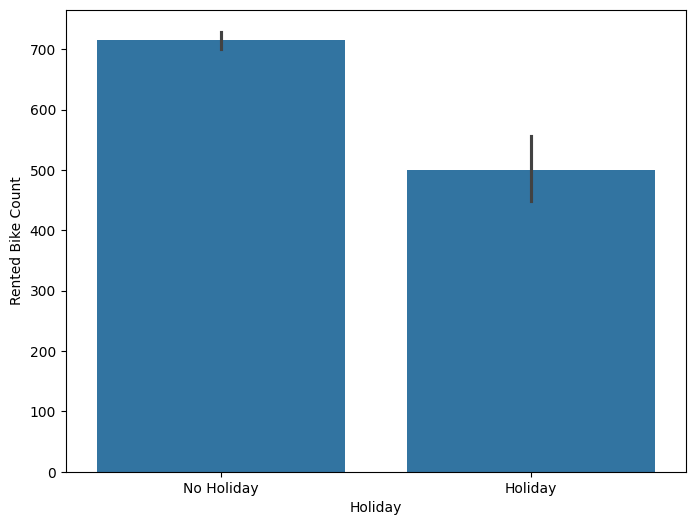

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x="Holiday",y="Rented Bike Count",data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

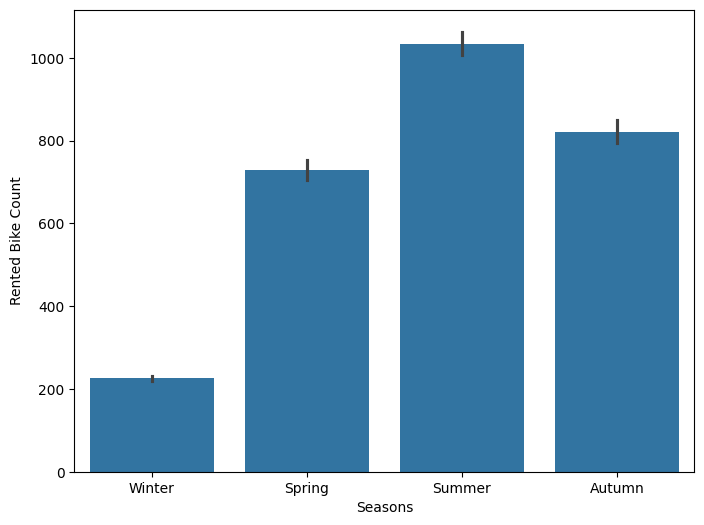

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x="Seasons",y="Rented Bike Count",data=df)

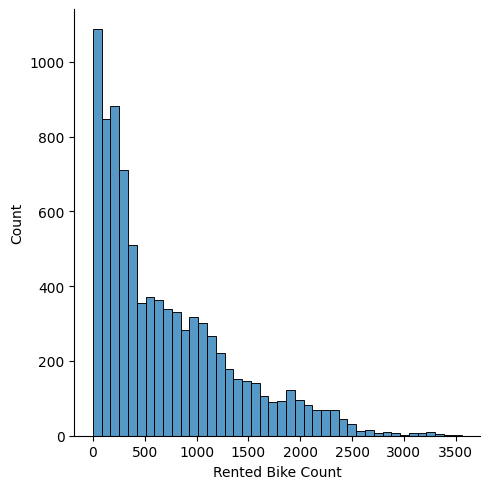

In [13]:
sns.displot(df["Rented Bike Count"])

In [14]:
# It only selects the numerical data and provide skew
df.select_dtypes(include=['number']).skew().sort_values()

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

<Axes: >

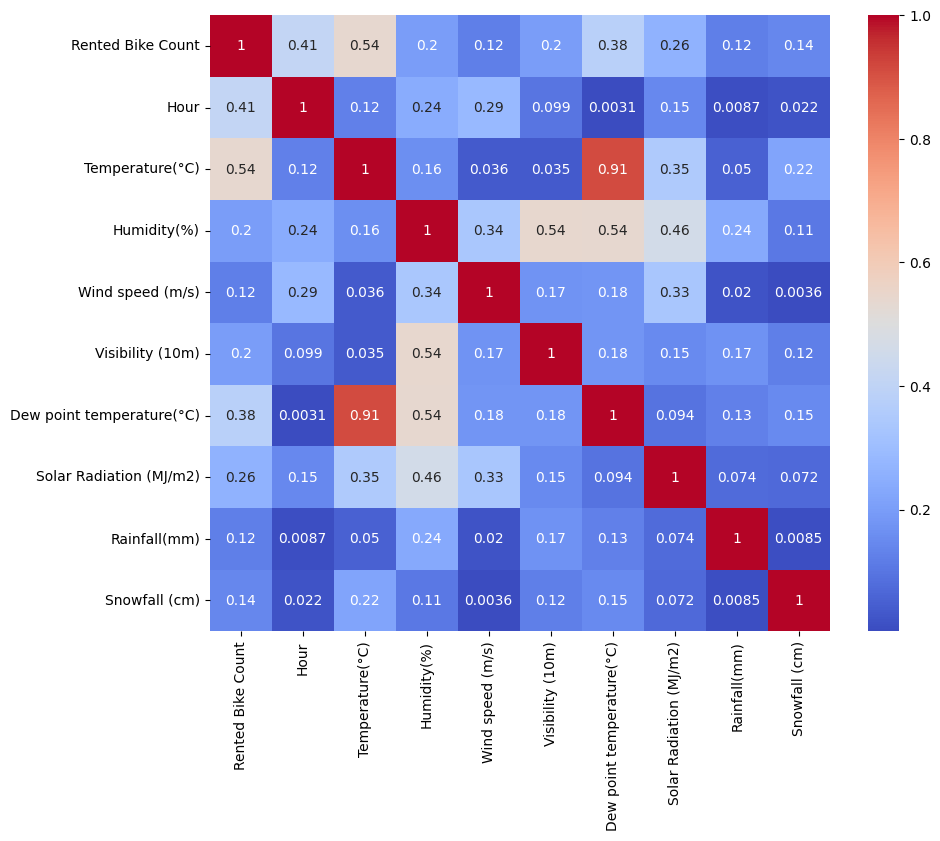

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(abs(df.select_dtypes(include=['float64', 'int64']).corr()), cmap='coolwarm', annot=True)


In [21]:
# Calculating Variance Inflation Factor

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif) 

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Day','Month','Year','Rented Bike Count','Dew point temperature(°C)']]])

In [376]:
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

Encoding

In [377]:
cat_features = ["Seasons","Holiday","Functioning Day","Week_Day"]

In [ ]:
df["Holiday"].value_counts()

In [379]:
df["Holiday"] = df["Holiday"].map({"No Holiday":0,"Holiday":1})
df["Functioning Day"] = df["Functioning Day"].map({"No":0,"Yes":1})

In [ ]:
df.head()

In [381]:
df_season = pd.get_dummies(df["Seasons"],drop_first=True )
df_weekday = pd.get_dummies(df["Week_Day"],drop_first=True)

In [382]:
df = pd.concat([df,df_season,df_weekday],axis=1)

In [ ]:
df.info()

In [384]:
df.drop(['Seasons','Week_Day'],axis=1,inplace=True)

In [ ]:
df.shape

Split Data for Training and Testing


In [386]:
X = df.drop("Rented Bike Count",axis = 1)
Y = df["Rented Bike Count"]

In [387]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
x_test[:3]

Training ML Model 

In [390]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

rir = Ridge()
rir.fit(x_train,y_train)
y_pred_rir = rir.predict(x_test)

lar = Lasso()
lar.fit(x_train,y_train)
y_pred_lar = rir.predict(x_test)

svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)

knnr = KNeighborsRegressor()
knnr.fit(x_train,y_train)
y_pred_knnr = knnr.predict(x_test)

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred_dtr = dtr.predict(x_test)

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)

poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
polyr = LinearRegression().fit(x_train_poly,y_train)
y_pred_poly = polyr.predict(x_test_poly)

xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)


In [391]:
def get_metrics(y_test,y_pred,model_name):
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)

    print(f"{model_name}:\nMSE:{MSE}\nRMSE:{RMSE}\nMAE:{MAE}\nR2:{R2}\n\n")

In [ ]:
get_metrics(y_test,y_pred_lr,"LinearRegression")
get_metrics(y_test,y_pred_rir,"Ridge")
get_metrics(y_test,y_pred_lar,"Lasso")
get_metrics(y_test,y_pred_svr,"SVR")
get_metrics(y_test,y_pred_knnr,"KNeighborsRegressor")
get_metrics(y_test,y_pred_dtr,"DecisionTreeRegressor")
get_metrics(y_test,y_pred_rfr,"RandomForestRegressor")
get_metrics(y_test,y_pred_poly,"PolynomialFeatures")
get_metrics(y_test,y_pred_xgb,"XGBRegressor")

Visualise prediction model

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred_lr)
plt.xlabel("ACtual Value")
plt.ylabel("Predicted Value")
plt.title("LinearRegression")
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred_rfr)
plt.xlabel("ACtual Value")
plt.ylabel("Predicted Value")
plt.title("Random Forest Regressor")
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred_xgb)
plt.xlabel("ACtual Value")
plt.ylabel("Predicted Value")
plt.title("XGBRegressor")
plt.show()